In [216]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from sklearn.decomposition import PCA

In [115]:
def zscore(x):
    xmean = x.mean(axis=0)
    xstd = np.std(x,axis=0)
    return (x - xmean) / xstd

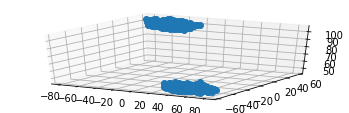

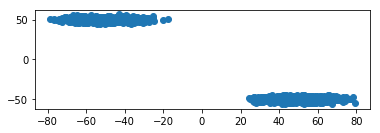

In [176]:
def make(mu, sigme, size):
    X = np.random.normal(mu, sigme, size)
    return X

X1=0
X2=0

def make_data(mu, sigma, pi, size):
    global X1
    global X2
    
    sigma1 = sigma[0]
    sigma2 = sigma[1]
    mu1 = mu[0]
    mu2 = mu[1]
    pi1 = pi[0]
    pi2 = pi[1]

    X = make(mu1, sigma1, int(size))
    X = np.hstack((X, make(mu1*-1, sigma1, int(size))))
    
    Y = make(mu2, sigma2, int(size))
    Y = np.hstack((Y, make(mu2*-1, sigma2, int(size))))
    
    Z = make(mu1, sigma2, int(size))
    Z = np.hstack((Z, make(mu1+mu1, sigma2, int(size))))

    #plt.scatter(X1[:,0], X1[:,1])
    #plt.scatter(X2[:,0], X2[:,1])

    
    fig = plt.figure()
    ax = fig.add_subplot(211, projection='3d')
    #ax.set_aspect('equal')
    ax.plot(X, Y, Z, "o")
    fig.show()
    
    fig = plt.figure()
    ax = fig.add_subplot(212)
    #ax.set_aspect('equal')
    ax.plot(X, Y, "o")
    fig.show()

    return X, Y, Z

MU1 = 50
SIGMA1 = 10
PI1 = 0.5
MU2 = -50
SIGMA2 = 2
PI2 = 1-PI1
size = 1000

X, Y, Z = make_data((MU1, MU2), (SIGMA1, SIGMA2), (PI1, PI2), size)

C:\Users\RAKUS\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


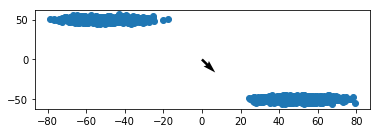

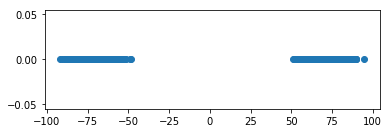

In [195]:
#pca = PCA(n_components=2)
#pca.fit(np.array([X, Y, Z]))

#plt.plot(pca.components_[0], pca.components_[1], "o")
data = (np.hstack((X.reshape(-1,1), Y.reshape(-1,1))))


fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(data[:,0], data[:,1], "o")


pca = PCA(n_components=1)
pca.fit(data)



ax.quiver(0, 0, pca.components_[0,0], pca.components_[0,1])
fig.show()


vec = data.dot(pca.components_.T)


fig = plt.figure()
ax = fig.add_subplot(212)
ax.plot(vec,np.zeros(vec.shape), "o")
fig.show()

C:\Users\RAKUS\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


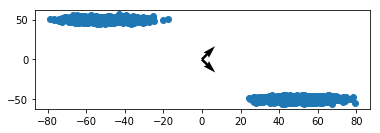

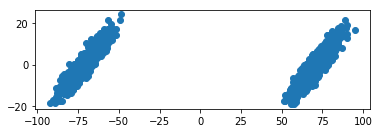

In [196]:
#pca = PCA(n_components=2)
#pca.fit(np.array([X, Y, Z]))

#plt.plot(pca.components_[0], pca.components_[1], "o")
data = (np.hstack((X.reshape(-1,1), Y.reshape(-1,1))))


fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(data[:,0], data[:,1], "o")


pca = PCA(n_components=2)
pca.fit(data)



ax.quiver(0, 0, pca.components_[0,0], pca.components_[0,1])
ax.quiver(0, 0, pca.components_[1,0], pca.components_[1,1])
fig.show()


vec = data.dot(pca.components_.T)


fig = plt.figure()
ax = fig.add_subplot(212)
ax.plot(vec[:,0], vec[:,1], "o")
fig.show()

<IPython.core.display.Javascript object>


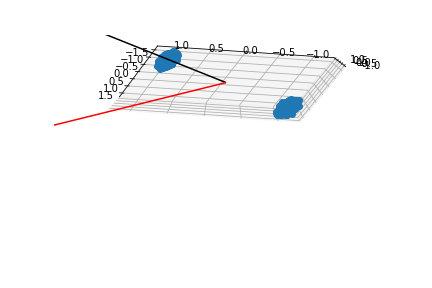

In [222]:
#pca = PCA(n_components=2)
#pca.fit(np.array([X, Y, Z]))

#plt.plot(pca.components_[0], pca.components_[1], "o")
%matplotlib notebook
data = zscore(np.hstack((X.reshape(-1,1), Y.reshape(-1,1), Z.reshape(-1,1))))


fig = plt.figure()
ax = fig.add_subplot(211, projection='3d')
ax.plot(data[:,0], data[:,1], data[:,2], "o")


pca = PCA(n_components=2)
pca.fit(data)


ax.quiver(0, 0, 0,  pca.components_[0,0]*50, pca.components_[0,1]*50, pca.components_[0,2]*50, Color='k')
ax.quiver(0, 0, 0,  pca.components_[1,0]*50, pca.components_[1,1]*50, pca.components_[1,2]*50, Color='r')
fig.show()


vec = data.dot(pca.components_.T)

#fig = plt.figure()
#ax = fig.add_subplot(212)
#ax.plot(vec[:,0], vec[:,1], "o")
#fig.show()

<IPython.core.display.Javascript object>


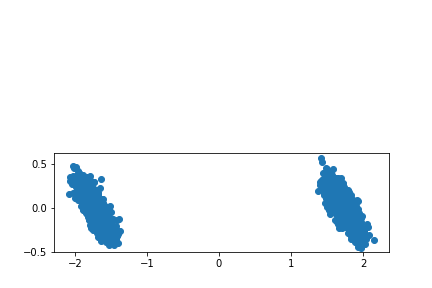

In [220]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(212)
ax.plot(vec[:,0], vec[:,1], "o")
fig.show()